# Figure with multiple AXES, set up manual!

### Example from a longitudinal survey in a estuary with vertical profiles of CTD

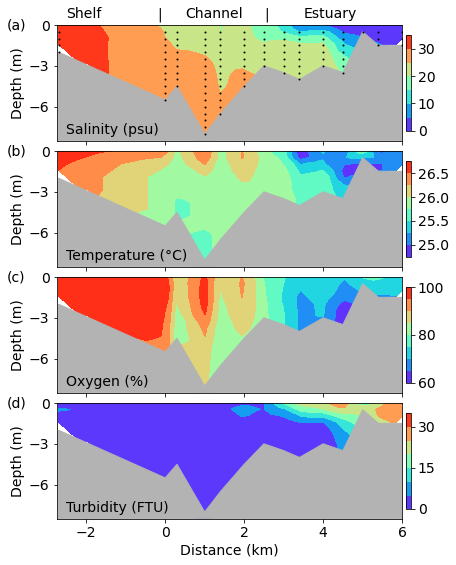

For further information, check   
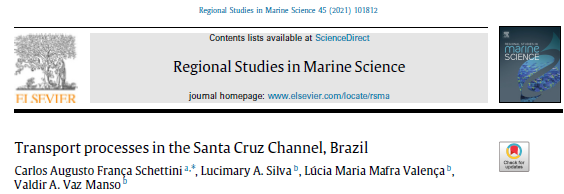

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

In [3]:
# load pre processed data
diretorio = r'd:\GUTO\1_Trabs\1_Aestus\Itamaraca\Campanha20040715\rotinas\\'
arquivo = 'ctd_longitudinal_rdz.txt'

d = np.loadtxt(diretorio + arquivo)

# variables in 'd'
# dist level sal temp ox ox turb

In [4]:
# separating the variables to make it clearer...

distancia = d[:,0]
nivel = d[:,1]
salinidade = d[:,2]
temperatura = d[:,3]
oxigenio_sat = d[:,4]
turbidez = d[:,6]

# correcting some oxigen values
idx = np.where(oxigenio_sat>100)
oxigenio_sat[idx]=100

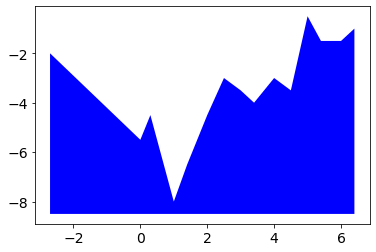

In [8]:
# to draw the bottom 'mask'
dist_ref = -100
distancias = []

# the distance along the survey
for di in distancia:
    if di > dist_ref:
        distancias.append(di)
        dist_ref = di

distancias2 = np.copy(distancias)        

# to find the maximum depth of every CTD profile
profundidades = []
for di in distancias:
    p_prof = np.min(nivel[distancia == di])
    profundidades.append(p_prof)

# closing the polygon in a not elegant fashion
distancias.append(distancias[-1])
profundidades.append(np.min(profundidades)-.5)

distancias.append(distancias[0])
profundidades.append(np.min(profundidades))

distancias.append(distancias[0])
profundidades.append(profundidades[0])

plt.fill(distancias, profundidades, 'b')

#### Interpolating

In [9]:
points = d[:,0:2]

xi = np.linspace(np.min(distancia), np.max(distancia), 50)
zi = np.linspace(np.min(nivel), np.max(nivel), 20)

xx, zz = np.meshgrid(xi, zi)

salinidade_i = griddata(points, salinidade, (xx, zz), method='linear')
temperatura_i = griddata(points, temperatura, (xx, zz), method='linear')
oxigenio_sat_i = griddata(points, oxigenio_sat, (xx, zz), method='linear')
turbidez_i = griddata(points, turbidez, (xx, zz), method='linear')

# stretch the zi a little for aesthetics purposes
zi_2 = np.linspace(np.min(nivel)-1, np.max(nivel)+.5, 20)
xx, zz_2 = np.meshgrid(xi, zi_2)


## Assembling the figure with multiple axes 

## Despite more laborious than just using the grid spacing of the subplots, this allow better positioning

### For example, the positioning of the colorbars as quite anoying... here we can put whereever we want


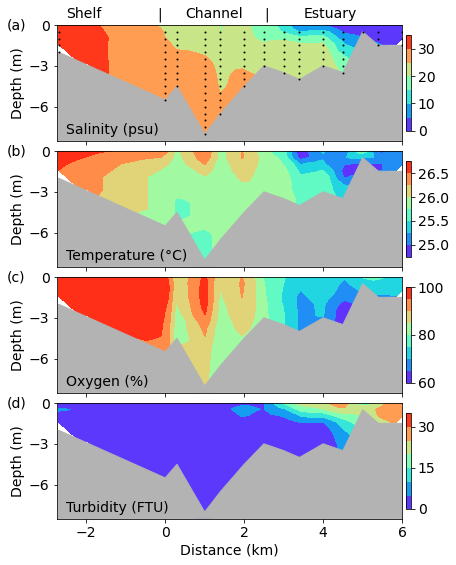

In [7]:
plt.rcParams.update({'font.size': 14})
fig = plt.figure(figsize=(6,7))

px = .1
py = .75
dx = .8
dy = .23
dint = .02

ax1 = fig.add_axes([px, py, dx, dy])
ax2 = fig.add_axes([px, py-(dy+dint), dx, dy])
ax3 = fig.add_axes([px, py-(dy+dint)*2, dx, dy])
ax4 = fig.add_axes([px, py-(dy+dint)*3, dx, dy])

pxcb = .91
dxcb = .01
fc = .02

cbax1 = fig.add_axes([pxcb, py+fc, dxcb, dy-fc*2])
cbax2 = fig.add_axes([pxcb, py-(dy+dint)+fc, dxcb, dy-fc*2])
cbax3 = fig.add_axes([pxcb, py-(dy+dint)*2+fc, dxcb, dy-fc*2])
cbax4 = fig.add_axes([pxcb, py-(dy+dint)*3+fc, dxcb, dy-fc*2])


c1 = ax1.contourf(xx, zz_2, salinidade_i, cmap='rainbow')
ax1.fill(distancias, profundidades, color=(.7, .7, .7))
ax1.plot(distancia, nivel, '.k', markersize=2)
ax1.set_ylim([-8.5, 0])
ax1.set_xlim([-2.75, 6])
ax1.set_yticks([-6, -3, 0])
ax1.set_ylabel('Depth (m)')
ax1.set_xticklabels('')

cbax1 = plt.colorbar(c1, cax=cbax1, ticks=[0, 10, 20, 30])


c2 = ax2.contourf(xx, zz_2, temperatura_i, cmap='rainbow')
ax2.fill(distancias, profundidades, color=(.7, .7, .7))
ax2.set_ylim([-8.5, 0])
ax2.set_xlim([-2.75, 6])
ax2.set_yticks([-6, -3, 0])
ax2.set_ylabel('Depth (m)')
ax2.set_xticklabels('')

cbax2 = plt.colorbar(c2, cax=cbax2, ticks=[25, 25.5, 26, 26.5])

c3 = ax3.contourf(xx, zz_2, oxigenio_sat_i, cmap='rainbow')
ax3.fill(distancias, profundidades, color=(.7, .7, .7))
ax3.set_ylim([-8.5, 0])
ax3.set_xlim([-2.75, 6])
ax3.set_yticks([-6, -3, 0])
ax3.set_ylabel('Depth (m)')
ax3.set_xticklabels('')

cbax3 = plt.colorbar(c3, cax=cbax3, ticks=[60, 80, 100])

c4 = ax4.contourf(xx, zz_2, turbidez_i, cmap='rainbow')
ax4.fill(distancias, profundidades, color=(.7, .7, .7))
ax4.set_ylim([-8.5, 0])
ax4.set_xlim([-2.75, 6])
ax4.set_yticks([-6, -3, 0])
ax4.set_ylabel('Depth (m)')
ax4.set_xlabel('Distance (km)')

cbax4 = plt.colorbar(c4, cax=cbax4, ticks=[0, 15, 30])

ax1.text(-4, -.3, '(a)')
ax2.text(-4, -.3, '(b)')
ax3.text(-4, -.3, '(c)')
ax4.text(-4, -.3, '(d)')

ax1.text(-2.5, -8, 'Salinity (psu)')
ax2.text(-2.5, -8, 'Temperature (°C)')
ax3.text(-2.5, -8, 'Oxygen (%)')
ax4.text(-2.5, -8, 'Turbidity (FTU)')

ax1.text(-2.5, .5, 'Shelf')
ax1.text(-.2, .5, '|')
ax1.text(.5, .5, 'Channel')
ax1.text(2.5, .5, '|')
ax1.text(3.5, .5, 'Estuary')

plt.show()